In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
print(cv2.__version__)

def imshow(title = "Image", image = None, size = 5):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


4.7.0


# Epipolar Geometry



In [8]:
# Setup matrix K

# Camera 1
K = np.array([[1000, 0, 300], [0,1000,200], [0,0,1]])
R1 = I = np.eye(3) #identity matrix
t1 = np.zeros((3,1))

#Camera 2
R2 = np.dot(np.array([0.7,-0.5,0.8]), R1)
t2 = np.array([0.2,2,1]).reshape(-1,1)
def R(x_theta, y_theta, z_theta) :
    A = np.array([[np.cos(z_theta), -np.sin(z_theta),0],[np.sin(z_theta), np.cos(z_theta), 0],[0,0,1]])
    B = np.array([[np.cos(y_theta),0, np.sin(y_theta)],[0,1,0],[-np.sin(y_theta),0,np.cos(y_theta)]])
    C = np.array([[1,0,0],[0,np.cos(x_theta), -np.sin(x_theta)],[0,np.sin(x_theta),np.cos(x_theta)]])
    return A@(B@C)


#Rotation
from scipy.spatial.transform import Rotation
R2 = Rotation.from_euler('xyz', [0.7, -0.5, 0.8]).as_matrix()
R2
t1


array([[0.],
       [0.],
       [0.]])

In [14]:
def Pi(p): #converts from homogeneous to inhomogeneous
    q = p[:-1]/p[-1]

    return q

def PiInv(q): #inhomogeneous to homogeneous
    p= np.vstack((q, np.ones(q.shape[1]))) #stack the inhomogenous with (1, )*n
    return(p)

In [57]:
#Exercise 3.1

Q = np.array([1,0.5,4,1]).reshape(-1,1) #Homogeneous coordinates

#Projection matrix in both cam 1 and 2
Rt1 = np.hstack((R1, t1))
q1 = Pi(K @ (Rt1@Q)) #convert to inhomogeneous

Rt2 = np.hstack((R2, t2))
q2 = Pi(K @ (Rt2@Q))
print(q1)
print(q2)

"Correct"



[[550.]
 [325.]]
[[582.47256835]
 [185.98985776]]


'Correct'

In [18]:
t1.shape

(3, 1)

In [50]:
#Exercise 3.2

def crossOp(p) :
    
    x,y,z = p[:,0]
    cross_op = np.array([[0,-z,y],
                         [z,0,-x],
                         [-y,x,0]])

    return cross_op

p = np.array([1,2,1]).reshape(-1,1)
crossop = crossOp(p)
crossop


array([[ 0, -1,  2],
       [ 1,  0, -1],
       [-2,  1,  0]])

In [59]:
#Finding Fundamental Matrix
#Exercise 3.2

#Essential Matrix
E = crossOp(t1)@R1
print(E)

p1 = np.linalg.inv(K)@q1
p2 = np.linalg.inv(K)@q2

# result = p2.T@E@p1
print(p1)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

# Applied Epipolar Geometry

/var/folders/tc/b7p8dkrn6c7gvn3w2zz30h4w0000gn/T/ipykernel_1307/2240523968.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.ginput(1)


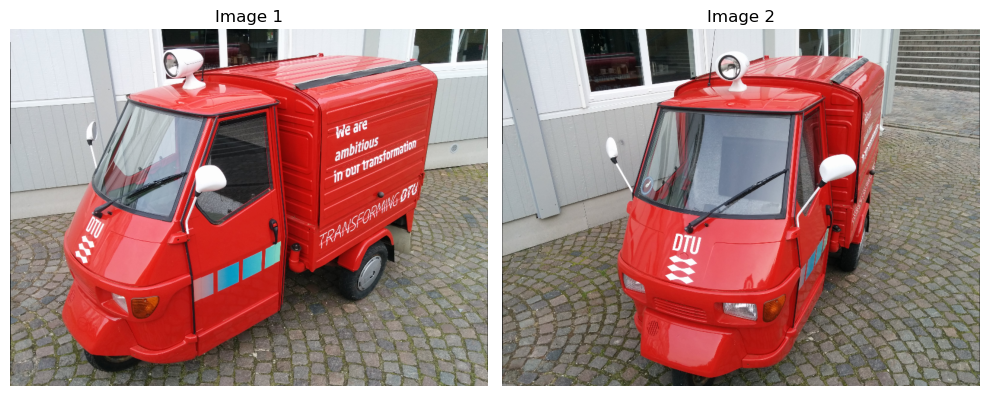

In [78]:
fname = np.load('TwoImageDataCar.npy', allow_pickle=True).item()

im1 = fname["im1"]
im2 = fname["im2"]

%matplotlib inline

# imshow("Image 1", im1)
# imshow("Image 2", im2)

# Create a figure and axis

def show2image(im1, im2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the images
    axes[0].imshow(im1)
    axes[0].set_title('Image 1')
    axes[0].axis('off')

    axes[1].imshow(im2)
    axes[1].set_title('Image 2')
    axes[1].axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.ginput(1)
    plt.show()

show2image(im1,im2)

In [86]:
import os
print(os.environ.get('QT_API'))

None


/var/folders/tc/b7p8dkrn6c7gvn3w2zz30h4w0000gn/T/ipykernel_1307/4129505475.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  click_point = plt.ginput(1)


KeyboardInterrupt: 

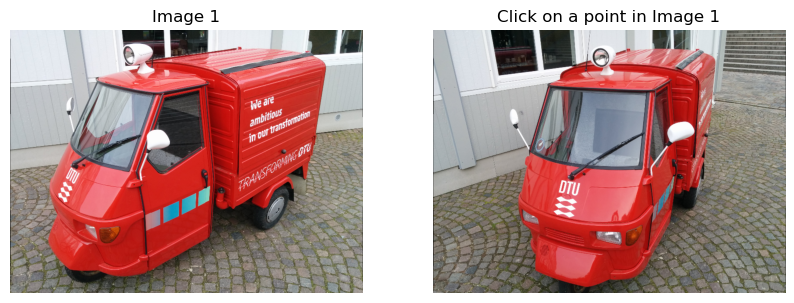

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to draw a line given in homogeneous coordinates
def DrawLine(ax, l, im_shape):
    """
    Draw a line on the plot given in homogeneous coordinates.
    
    Parameters:
        ax (Axes): Axes object to draw the line on.
        l (array-like): Homogeneous coordinates of the line [a, b, c].
        im_shape (tuple): Shape of the image (height, width).
    """
    if abs(l[0]) > abs(l[1]):
        # The line is more vertical, so plot the line for the range of y values
        ys = np.array([0, im_shape[0]])
        xs = (-l[1] * ys - l[2]) / l[0]
    else:
        # The line is more horizontal, so plot the line for the range of x values
        xs = np.array([0, im_shape[1]])
        ys = (-l[0] * xs - l[2]) / l[1]
    ax.plot(xs, ys, 'r-')


# Load the images
image1 = im1
image2 = im2

# Display both images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[0].axis('off')
axes[1].imshow(image2)
axes[1].set_title('Image 2')
axes[1].axis('off')

# Click on a point in image1
plt.title('Click on a point in Image 1')
plt.axis('off')
click_point = plt.ginput(1)
plt.close()


In [ ]:
#Exercise 3.9
